<function matplotlib.pyplot.show(close=None, block=None)>

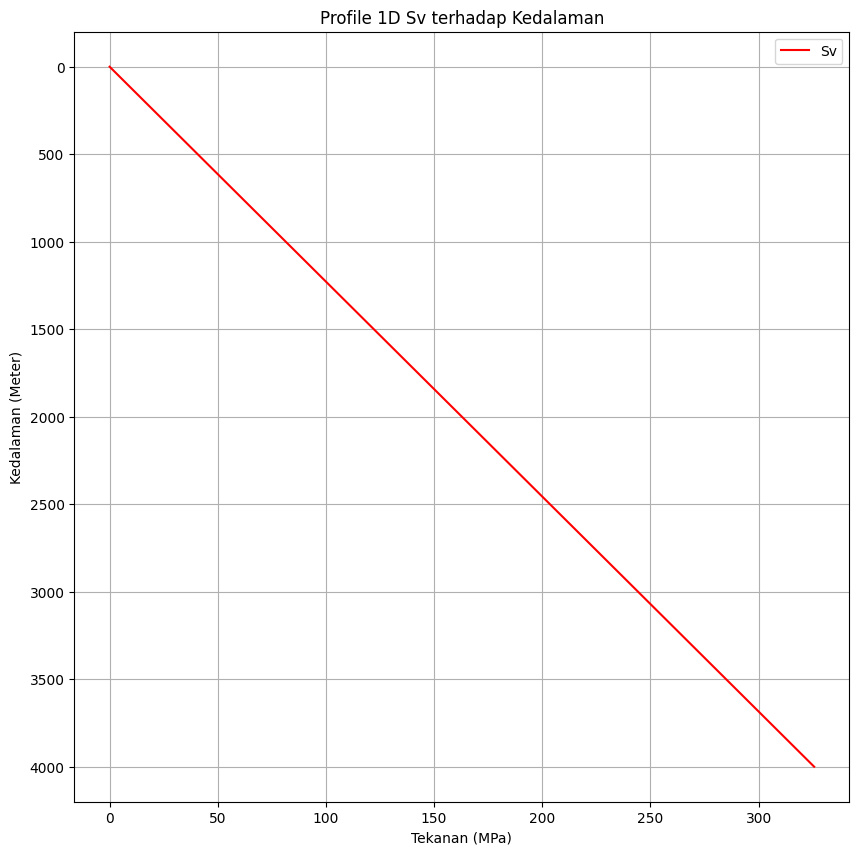

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# input parameter
densitas_batuan = (83/10) * 1000 #kg/m^3 ; 2 nagka nim terakhir adalah 83
g = 9.81 #m/s^2 ; percepatan gravitasi
h = np.linspace(0, 4000, 100) #m ; menghitung pada rentang kedalaman 0 hingga 4000m dengan interval 100m

# Kalkulasi Sv
Sv = (densitas_batuan * g * h) / 1000000 #MPa

# plot profil 1D
plt.figure(figsize=(10, 10))
plt.plot(Sv, h, color = 'red', label = 'Sv')
plt.xlabel('Tekanan (MPa)')
plt.ylabel('Kedalaman (Meter)')
plt.gca().invert_yaxis()
plt.title('Profile 1D Sv terhadap Kedalaman')
plt.legend()
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

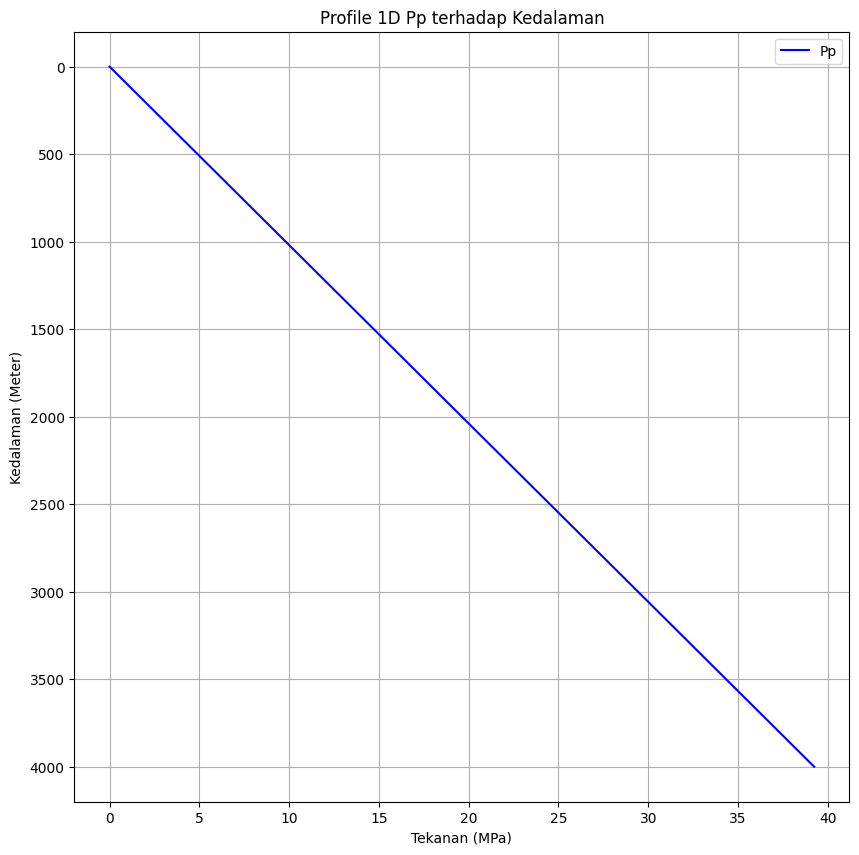

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# input parameter
densitas_air = 1000 #kg/m^3 ; 2 nagka nim terakhir adalah 83
g = 9.81 #m/s^2 ; percepatan gravitasi
h = np.linspace(0, 4000, 100) #m ; menghitung pada rentang kedalaman 0 hingga 4000m dengan interval 100m

# Kalkulasi Pp
Pp = (densitas_air * g * h) / 1000000 #MPa

# plot profil 1D
plt.figure(figsize=(10, 10))
plt.plot(Pp, h, color = 'Blue', label = 'Pp')
plt.xlabel('Tekanan (MPa)')
plt.ylabel('Kedalaman (Meter)')
plt.gca().invert_yaxis()
plt.title('Profile 1D Pp terhadap Kedalaman')
plt.legend()
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

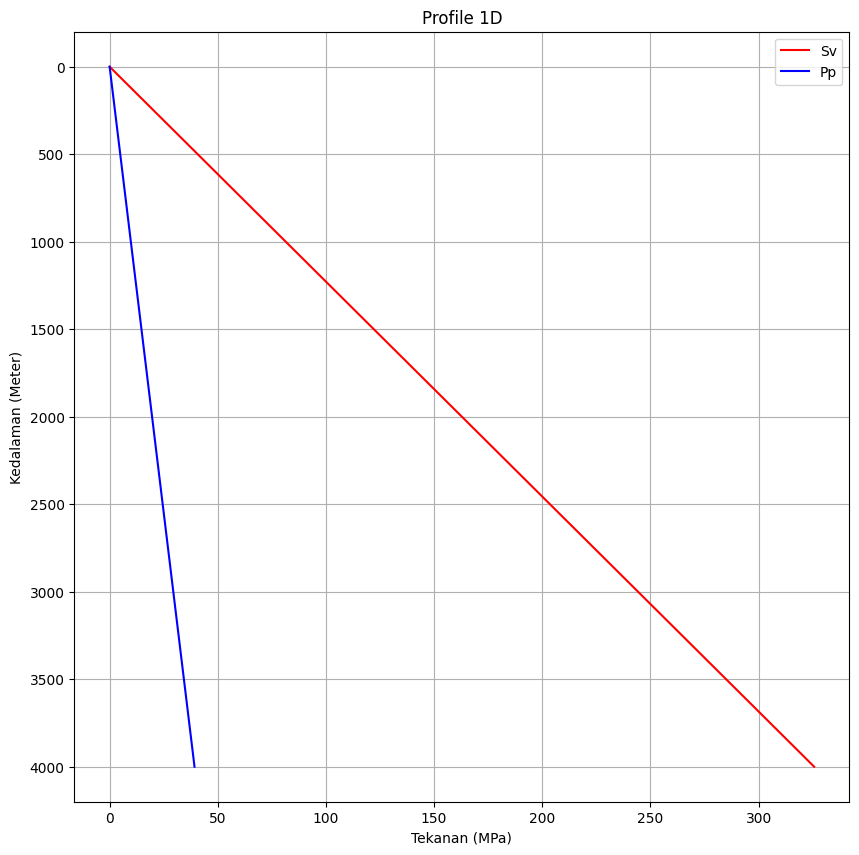

In [4]:
# plot profil 1D
plt.figure(figsize=(10, 10))
plt.plot(Sv, h, color = 'red', label = 'Sv')
plt.plot(Pp, h, color = 'Blue', label = 'Pp')
plt.xlabel('Tekanan (MPa)')
plt.ylabel('Kedalaman (Meter)')
plt.gca().invert_yaxis()
plt.title('Profile 1D')
plt.legend()
plt.grid(True)
plt.show

Sv at 1.5 km = 122.1345
Pp at 1.5 km = 14.715
μ = 0.300 ; Shmin = 74.18 MPa ; SHmax = 208.76 MPa
μ = 0.400 ; Shmin = 63.95 MPa ; SHmax = 249.06 MPa
μ = 0.600 ; Shmin = 49.15 MPa ; SHmax = 349.80 MPa
μ = 0.800 ; Shmin = 39.53 MPa ; SHmax = 479.73 MPa


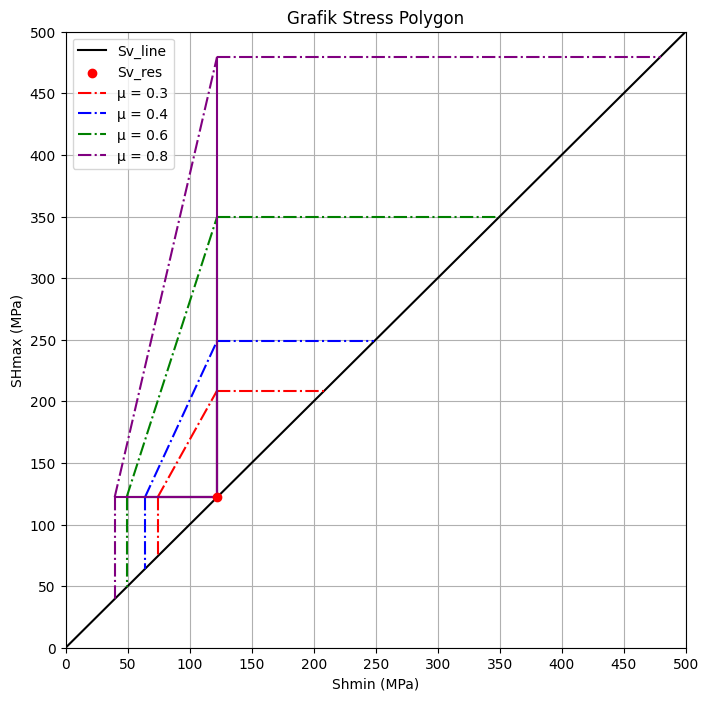

In [71]:
# Set up Parameter
Depth_res=1500
miu_friction = [0.3, 0.4, 0.6, 0.8] # Nilai koefisien friksi batuan
Sv_res = densitas_batuan*g*Depth_res / 1000000 # Sv pada kedalaman 1500m (MPa)
Pp_res =  densitas_air*g*Depth_res / 1000000 # Pp pada kedalaman 1500m (MPa)
print(f'Sv at 1.5 km = {Sv_res}')
print(f'Pp at 1.5 km = {Pp_res}')

# Kalkulasi Shmin dan SHmax
SHmax = np.zeros_like(miu_friction)
Shmin = np.zeros_like(miu_friction)
for i in range (len(miu_friction)):
    friction_limit = (np.sqrt(miu_friction[i]**2 + 1) + miu_friction[i])**2 
    Shmin[i] = (Sv_res - Pp_res + (friction_limit * Pp_res)) / friction_limit
    SHmax[i] = (friction_limit * Sv_res) - (friction_limit * Pp_res) + Pp_res
    print(f"μ = {miu_friction[i]:.3f} ; Shmin = {Shmin[i]:.2f} MPa ; SHmax = {SHmax[i]:.2f} MPa")

#Plot Base
plt.figure(figsize=(8, 8))
plt.xticks(np.arange(0, 550, 50)) 
plt.yticks(np.arange(0, 550, 50)) 
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.xlabel("Shmin (MPa)")
plt.ylabel("SHmax (MPa)")
plt.title("Stress Polygon")

#Plot Sv
plt.axline((0, 0), slope=1, color='black', linestyle='solid', label="Sv_line")
plt.scatter(Sv_res, Sv_res, color='r', label="Sv_res", zorder=3)
colors = ['red', 'blue', 'green', 'purple']

#Plot Polygon
for i in range (len(miu_friction)):
    # Normal Faulting
    plt.vlines(Shmin[i], Sv_res, Shmin[i], colors[i],linestyle='dashdot') # Vertical Plot
    plt.hlines(Sv_res, Shmin[i], Sv_res, colors[i]) # Horizontal Plot

    # Strike-Slip Faulting
    plt.plot([Shmin[i], Sv_res], [Sv_res, SHmax[i]], colors[i], linestyle='dashdot',label=f"μ = {miu_friction[i]}", )

    # Reverse Faulting
    plt.vlines(Sv_res, SHmax[i], Sv_res, colors[i]) # Vertical
    plt.hlines(SHmax[i], Sv_res, SHmax[i], colors[i], linestyle='dashdot') # Horizontal

plt.title("Grafik Stress Polygon")
plt.grid(True)
plt.legend()
plt.show() 


Sv at 1.5 km = 122.1345
Pp 140% at 1.5 km = 20.601
μ = 0.300 ; Shmin = 76.81 MPa ; SHmax = 204.01 MPa
μ = 0.400 ; Shmin = 67.14 MPa ; SHmax = 242.11 MPa
μ = 0.600 ; Shmin = 53.15 MPa ; SHmax = 337.33 MPa
μ = 0.800 ; Shmin = 44.06 MPa ; SHmax = 460.14 MPa


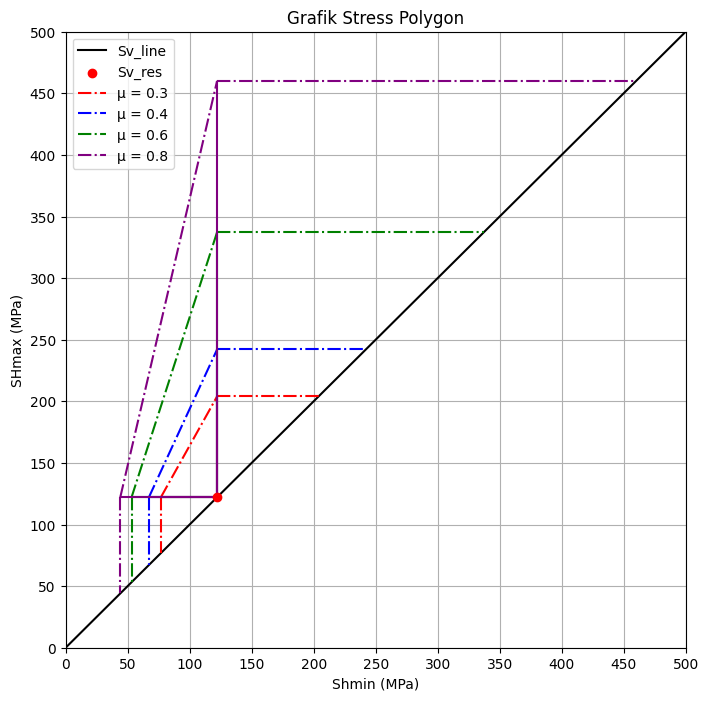

In [70]:
# Set up Parameter
Depth_res=1500
miu_friction = [0.3, 0.4, 0.6, 0.8] # Nilai koefisien friksi batuan
Sv_res = densitas_batuan*g*Depth_res / 1000000 # Sv pada kedalaman 1500m (MPa)
Pp_res =  (1.4)*densitas_air*g*Depth_res / 1000000 # Pp pada kedalaman 1500m (MPa)

print(f'Sv at 1.5 km = {Sv_res}')
print(f'Pp 140% at 1.5 km = {Pp_res}')

# Kalkulasi Shmin dan SHmax
SHmax = np.zeros_like(miu_friction)
Shmin = np.zeros_like(miu_friction)
for i in range (len(miu_friction)):
    friction_limit = (np.sqrt(miu_friction[i]**2 + 1) + miu_friction[i])**2 
    Shmin[i] = (Sv_res - Pp_res + (friction_limit * Pp_res)) / friction_limit
    SHmax[i] = (friction_limit * Sv_res) - (friction_limit * Pp_res) + Pp_res
    print(f"μ = {miu_friction[i]:.3f} ; Shmin = {Shmin[i]:.2f} MPa ; SHmax = {SHmax[i]:.2f} MPa")

#Plot Base
plt.figure(figsize=(8, 8))
plt.xticks(np.arange(0, 550, 50)) 
plt.yticks(np.arange(0, 550, 50)) 
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.xlabel("Shmin (MPa)")
plt.ylabel("SHmax (MPa)")
plt.title("Stress Polygon")

#Plot Sv
plt.axline((0, 0), slope=1, color='black', linestyle='solid', label="Sv_line")
plt.scatter(Sv_res, Sv_res, color='r', label="Sv_res", zorder=3)
colors = ['red', 'blue', 'green', 'purple']

#Plot Polygon
for i in range (len(miu_friction)):
    # Normal Faulting
    plt.vlines(Shmin[i], Sv_res, Shmin[i], colors[i],linestyle='dashdot') # Vertical Plot
    plt.hlines(Sv_res, Shmin[i], Sv_res, colors[i]) # Horizontal Plot

    # Strike-Slip Faulting
    plt.plot([Shmin[i], Sv_res], [Sv_res, SHmax[i]], colors[i], linestyle='dashdot',label=f"μ = {miu_friction[i]}", )

    # Reverse Faulting
    plt.vlines(Sv_res, SHmax[i], Sv_res, colors[i]) # Vertical
    plt.hlines(SHmax[i], Sv_res, SHmax[i], colors[i], linestyle='dashdot') # Horizontal

plt.title("Grafik Stress Polygon")
plt.grid(True)
plt.legend()
plt.show() 